Elementos faltantes por coluna:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
RMSE (Regressão com Árvore de Decisão): 6623.338129361347


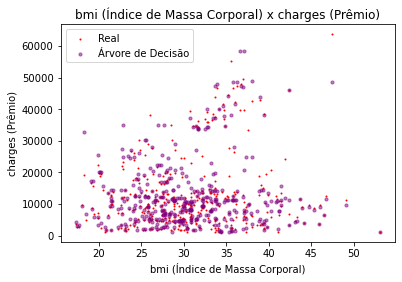

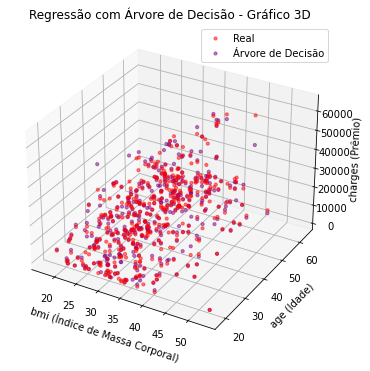

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Carrega os dados
df = pd.read_csv('diabetes.csv')

# Converte "sim" para 1 e "não" para 0 na coluna "smoker"
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

# Verifica elementos faltantes
missing_values = df.isnull().sum()

# Exibe os resultados
print("Elementos faltantes por coluna:")
print(missing_values)


# Separação dos dados em treino e teste
XTrain, XTest, yTrain, yTest = train_test_split(df[["bmi", "age", "smoker"]], df["charges"], test_size=0.3)

# Regressão por árvore de decisão
regressor_tree = DecisionTreeRegressor()
regressor_tree.fit(XTrain, yTrain)

# Predict usando árvore de decisão
yPred_tree = regressor_tree.predict(XTest)

# Calcula o RMSE para a árvore de decisão
rmse_tree = np.sqrt(mean_squared_error(yTest, yPred_tree))

print(f"RMSE (Regressão com Árvore de Decisão): {rmse_tree}")

# Visualização (considerando apenas uma variável independente para o gráfico)
plt.scatter(XTest["bmi"], yTest, color='red', s=1, label='Real')
plt.scatter(XTest["bmi"], yPred_tree, color='purple', s=10, alpha=0.5, label='Árvore de Decisão')
plt.title("bmi (Índice de Massa Corporal) x charges (Prêmio)")
plt.xlabel("bmi (Índice de Massa Corporal)")
plt.ylabel("charges (Prêmio)")
plt.legend()
plt.show()

# Visualização 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot com tamanho e cores ajustados
ax.scatter(XTest["bmi"], XTest["age"], yTest, color='red', label='Real', s=10, alpha=0.5)
ax.scatter(XTest["bmi"], XTest["age"], yPred_tree, color='purple', label='Árvore de Decisão', s=10, alpha=0.5)

# Configurações do gráfico
ax.set_xlabel("bmi (Índice de Massa Corporal)")
ax.set_ylabel("age (Idade)")
ax.set_zlabel("charges (Prêmio)")
ax.set_title("Regressão com Árvore de Decisão - Gráfico 3D")

# Adiciona uma grade
ax.grid(True, linestyle='--', alpha=0.5)

# Adiciona uma legenda
ax.legend()

plt.show()

#a normalização não é necessária para árvores de decisão, pois elas não são sensíveis à escala das variáveis. 